## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Part 1. Linear regression model

## Load regression data

In [2]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

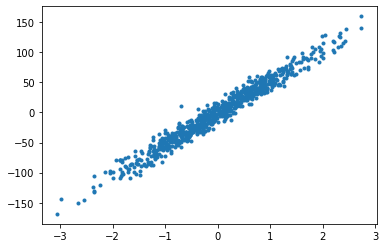

In [3]:
plt.plot(x_train, y_train, '.')

In [4]:
# x_train, x_test, y_train, y_test
x_train = x_train.flatten()
x_test = x_test.flatten()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750,)
(250,)
(750,)
(250,)


## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [5]:
def MSE(Y_pred, Y):
    return (1 / Y.shape[0]) * np.sum((Y_pred - Y) ** 2)

In [6]:
class Linear_Regression:
    def __init__(self, X, Y, X_test, Y_test):
        """
            (discarded) normalized training data ~ N(0,var)
            initialize weights
        """
        self.__X = X
        self.__Y = Y
        self.__X_test = X_test
        self.__Y_test = Y_test
        self.__w = [0, np.var(Y)]

    def train(self, lr=1e-4, iter_max=100):
        self.__lr = lr

        train_loss = []
        test_loss = []
        N = len(self.__X)
        iter_i = 0

        while iter_i <= iter_max:

            Y_pred = self.__w[0] + (self.__w[1] * self.__X)

            self.__w[0] = self.__w[0] - (lr * (1 / N) *
                                         np.sum(Y_pred - self.__Y))
            self.__w[1] = self.__w[1] - (lr * (1 / N) *
                                         np.sum((Y_pred - self.__Y) * self.__X))

            # print stat
            train_loss.append(MSE(self.predict(self.__X), self.__Y))
            test_loss.append(MSE(self.predict(self.__X_test), self.__Y_test))
            print("Iteration: {} Loss: {:.6f}".format(
                iter_i, train_loss[iter_i]))
            iter_i += 1

        self.__train_loss = train_loss
        self.__test_loss = test_loss

    def print_weights(self):
        print("[w0,w1] = {}".format(self.__w))

    def predict(self, X_test):
        return self.__w[0] + (self.__w[1] * X_test)

    def plot_l_curve(self):
        """ plot learning curve: train loss & test loss"""
        plt.plot(np.arange(len(self.__train_loss)),
                 self.__train_loss, label='train loss')
        plt.plot(np.arange(len(self.__test_loss)),
                 self.__test_loss, label='val loss')
        print(self.__train_loss[-1])
        print(self.__test_loss[-1])
        plt.legend(loc='upper center')
        plt.ylabel('Loss')
        plt.xlabel('Iterations')
        plt.title('learning curve')
        plt.show()


In [7]:
# Main program
model = Linear_Regression(x_train, y_train, x_test, y_test)
model.train(lr=0.5, iter_max=40)

Iteration: 0 Loss: 1847396.205059
Iteration: 1 Loss: 528084.544041
Iteration: 2 Loss: 151185.025663
Iteration: 3 Loss: 43378.107646
Iteration: 4 Loss: 12507.795092
Iteration: 5 Loss: 3659.751538
Iteration: 6 Loss: 1121.637679
Iteration: 7 Loss: 393.044689
Iteration: 8 Loss: 183.764905
Iteration: 9 Loss: 123.619614
Iteration: 10 Loss: 106.326371
Iteration: 11 Loss: 101.352161
Iteration: 12 Loss: 99.920892
Iteration: 13 Loss: 99.508941
Iteration: 14 Loss: 99.390341
Iteration: 15 Loss: 99.356189
Iteration: 16 Loss: 99.346353
Iteration: 17 Loss: 99.343520
Iteration: 18 Loss: 99.342704
Iteration: 19 Loss: 99.342468
Iteration: 20 Loss: 99.342401
Iteration: 21 Loss: 99.342381
Iteration: 22 Loss: 99.342375
Iteration: 23 Loss: 99.342374
Iteration: 24 Loss: 99.342373
Iteration: 25 Loss: 99.342373
Iteration: 26 Loss: 99.342373
Iteration: 27 Loss: 99.342373
Iteration: 28 Loss: 99.342373
Iteration: 29 Loss: 99.342373
Iteration: 30 Loss: 99.342373
Iteration: 31 Loss: 99.342373
Iteration: 32 Loss: 99

In [8]:
model.print_weights()

[w0,w1] = [-0.3337588897141167, 52.7435404827579]


99.34237308797246
110.43819262680604


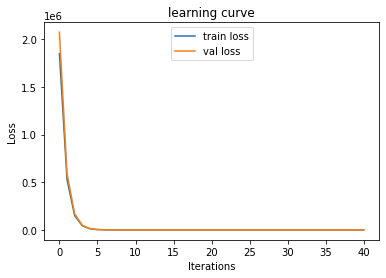

In [9]:
model.plot_l_curve()


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

In [10]:
y_pred = model.predict(x_test)
print(f"MSE: {MSE(y_pred, y_test)}")

MSE: 110.43819262680604


In [11]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
# y_pred = reg.predict(x_test.reshape(-1, 1))
# print(f"MSE: {MSE(y_pred.flatten(), y_test)}")


# Part 2. Logistic regreesion model

## Load classification data

In [13]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

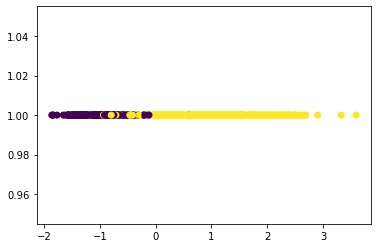

In [13]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

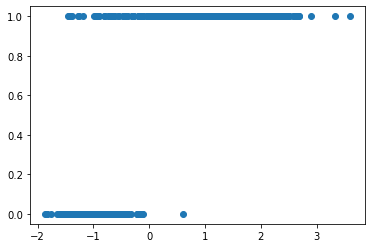

In [14]:
plt.scatter(x_train, y_train)


In [14]:
# x_train, x_test, y_train, y_test
x_train = x_train.flatten()
x_test = x_test.flatten()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750,)
(250,)
(750,)
(250,)


In [15]:
def Cross_Entropy(Y_pred, Y):
    return - (1 / Y.shape[0]) * np.sum(Y * np.log(Y_pred + 1e-100) + (1 - Y) * np.log(1 - Y_pred + 1e-100))

In [16]:
class Logistic_Regression:
    def __init__(self, X, Y, X_test, Y_test):
        """
            (discarded) normalized training data ~ N(0,var)
            initialize weights
        """
        self.__X = X
        self.__Y = Y
        self.__X_test = X_test
        self.__Y_test = Y_test
        self.__w = [-10, 10]

    def train(self, lr=1e-4, iter_max=100):
        self.__lr = lr
        def sigmoid(x): return 1/(1 + np.exp(-x))

        train_loss = []
        test_loss = []
        N = len(self.__X)
        iter_i = 0

        while iter_i <= iter_max:

            Y_pred = sigmoid(self.__w[0] + (self.__w[1] * self.__X))
            # Y_pred = self.predict(self.__X)

            self.__w[0] = self.__w[0] - (lr * np.sum(Y_pred - self.__Y) / N)
            self.__w[1] = self.__w[1] - \
                (lr * np.sum((Y_pred - self.__Y) * self.__X) / N)

            # print stat
            # train_loss.append(Cross_Entropy(self.predict(self.__X), self.__Y))
            # test_loss.append(Cross_Entropy(
            #     self.predict(self.__X_test), self.__Y_test))
            train_loss.append(Cross_Entropy(sigmoid(self.__w[0] + (self.__w[1] * self.__X)), self.__Y))
            test_loss.append(Cross_Entropy(
                sigmoid(self.__w[0] + (self.__w[1] * self.__X_test)), self.__Y_test))
            # print("Iteration: {} Loss: {:.6f}".format(iter_i, train_loss[iter_i]))
            iter_i += 1

        self.__train_loss = train_loss
        self.__test_loss = test_loss

    def print_weights(self):
        print("[w0,w1] = {}".format(self.__w))

    def predict(self, X):
        def sigmoid(x): return 1/(1 + np.exp(-x))
        p1 = sigmoid(self.__w[0] + (self.__w[1] * X))
        p0 = 1 - p1
        return np.array([1 if x else 0 for x in (p1 > p0)])

    def plot_l_curve(self):
        """ plot learning curve: train loss & test loss"""
        plt.plot(np.arange(len(self.__train_loss)),
                 self.__train_loss, label='train loss')
        plt.plot(np.arange(len(self.__test_loss)),
                 self.__test_loss, label='test loss')
        print(self.__train_loss[-1])
        print(self.__test_loss[-1])
        plt.legend(loc='upper center')
        plt.ylabel('Loss')
        plt.xlabel('Iterations')
        plt.title('learning curve')
        plt.show()

In [17]:
# Main program
model = Logistic_Regression(x_train, y_train, x_test, y_test)
model.train(lr=10, iter_max=100)

In [18]:
model.print_weights()

[w0,w1] = [1.731050851171446, 4.908753424351506]


0.17043806442524276
0.1894341064709086


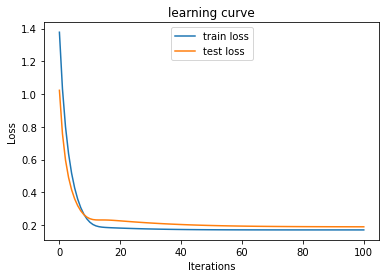

In [19]:
model.plot_l_curve()


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

In [21]:
y_pred = model.predict(x_test)
print(f"Cross Entropy: {Cross_Entropy(y_pred, y_test)}")
print(f"accuracy: {accuracy_score(y_pred, y_test)}")

Cross Entropy: 9.210340371976184
accuracy: 0.96


In [22]:
# X = np.array([0, 0, 1, 1, 0])
# A = np.array([0, 0 ,0 ,1, 0])
# # print(A * np.log(X+ 1e-100))
# # print(np.sum(A * np.log(X+ 1e-100)))

# print((1-A) * np.log(1 - X + 1e-100))
# print(np.sum((1-A) * np.log(1 - X + 1e-1)))
# print(np.log(1 - 0 + 1e-200))

In [23]:
# x = np.array([1, 3 ,4 ,5, 6])
# print(1/(1 + np.exp(-x)))
# print(1/(1 + np.exp(-x[0])))

In [5]:
x = np.array([1004, 3 ,999 ,-4, 6])
sigmoid = lambda x: 1/(1 + np.exp(-x))
p0 = sigmoid(-1 + (0.1 * x))
p1 = 1 - p0
print(p0)
print(p1)
np.array([0 if x else 1 for x in (p0 > p1)])

[1.         0.33181223 1.         0.19781611 0.40131234]
[0.         0.66818777 0.         0.80218389 0.59868766]


array([0, 1, 0, 1, 1])

In [6]:
x = -1 + (0.1 * 1004)
1/ (1+np.exp(-x))

0.9525741268224334

In [25]:
# # model.predict(x_train) == y_train
# model.predict(x_test) == y_test
# # model.predict(x_train)
# # y_train

In [26]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression().fit(x_train.reshape(-1, 1), y_train)
# y_pred = clf.predict(x_test.reshape(-1, 1))
# accuracy_score(y_pred, y_test)
